In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

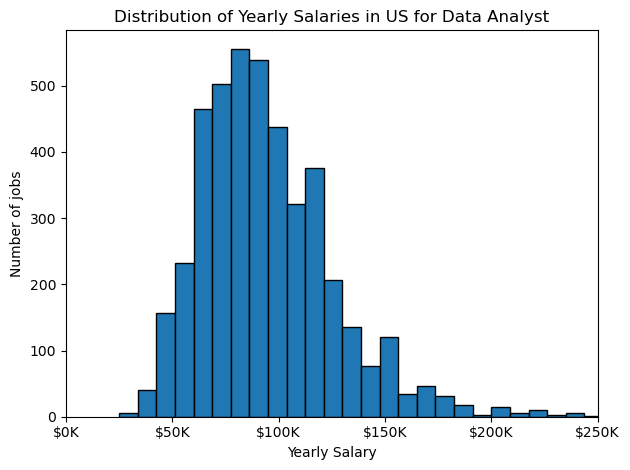

In [13]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.title('Distribution of Yearly Salaries in US for Data Analyst')
plt.tight_layout()
plt.show()

In [14]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

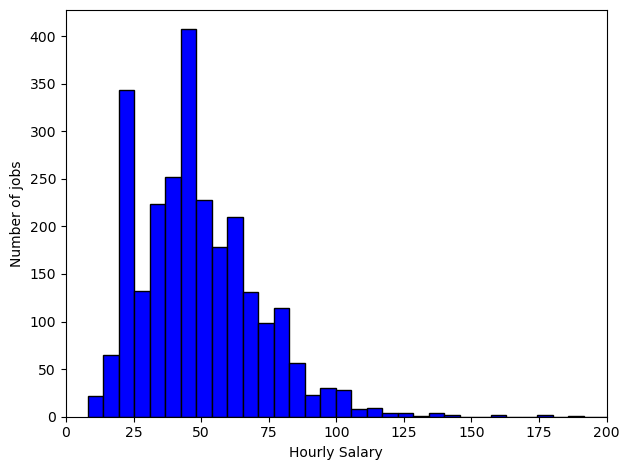

In [19]:
df_DS['salary_hour_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black', color = 'blue')
plt.xlim(0, 200)

#ax = plt.gca()
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Hourly Salary')
plt.ylabel('Number of jobs')
plt.tight_layout()
plt.show()

In [21]:
df_skills = df.dropna(subset=['job_skills']).copy()

In [22]:
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

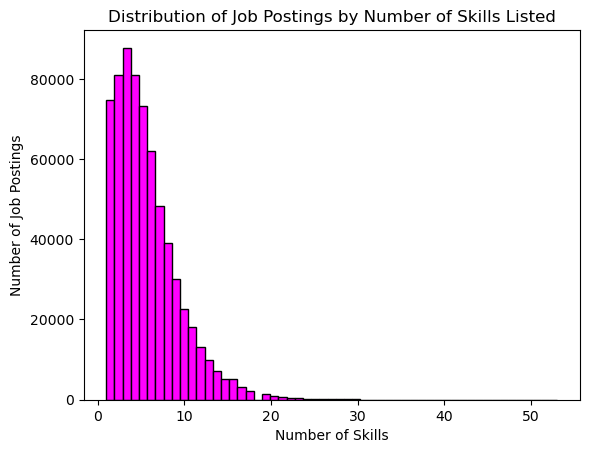

In [23]:
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

In [24]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

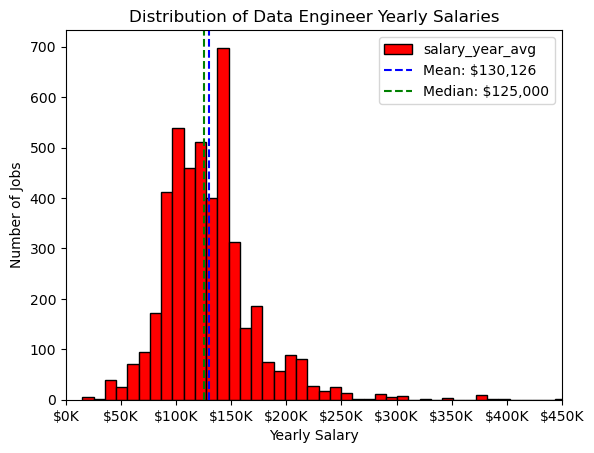

In [33]:
df_DE['salary_year_avg'].plot(kind = 'hist', bins = 50, edgecolor = 'black', color = 'red')
plt.xlim(0, 450000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

plt.axvline(mean_salary, color = 'blue', linestyle = 'dashed', label = f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()